In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

### Загрузка данных

In [11]:
def dateparse(x):
    if len(x) > 37:
        return datetime.datetime.strptime(x[:-21], '%Y-%m-%dT%H:%M:%S')
    else:
        return datetime.datetime.strptime(x[:-21], '%Y-%m-%dT%H:%M')

df_test = pd.read_csv('test_3_result.csv', sep=';', parse_dates=['Timestamp'], date_parser=dateparse)

In [12]:
def dateparse(x):
    return datetime.datetime.strptime(x, '%d.%m.%y %H:%M')
df_hours = pd.read_csv('scen_3_forecast_so_ko_hours.csv', sep=';', parse_dates=['dt'], date_parser=dateparse)

### Общий график

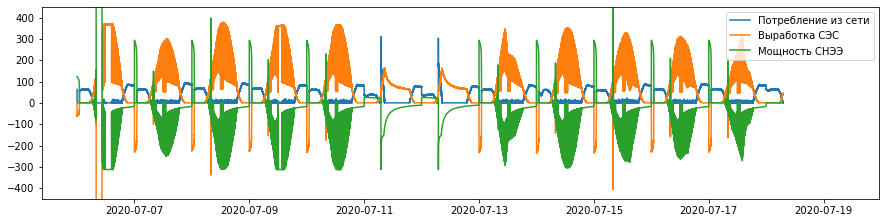

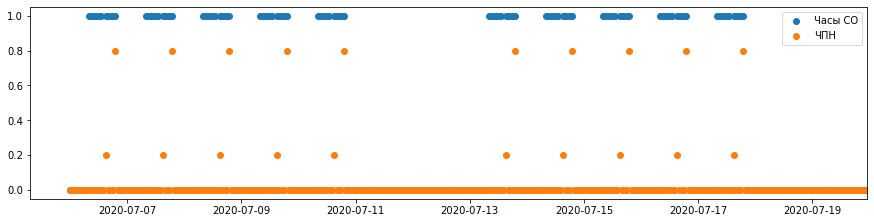

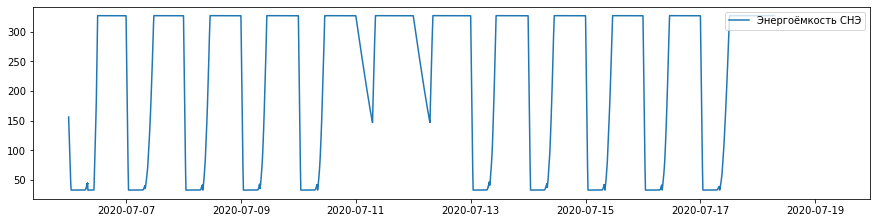

In [19]:
start_date = df_test.Timestamp[0]
end_date = df_test.Timestamp[len(df_test) - 1]


plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(df_test['Timestamp'], df_test['Power from grid'], label='Потребление из сети')
plt.plot(df_test['Timestamp'], df_test['Solar power'], label='Выработка СЭС')
plt.plot(df_test['Timestamp'], df_test['Accum set point'], label='Мощность СНЭЭ')
plt.xlim([None, end_date])
plt.ylim([-450, 450])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 2)
plt.scatter(df_hours['dt'], df_hours['so_h_forec'], label="Часы СО")
plt.scatter(df_hours['dt'], df_hours['ko_h_forec'], label="ЧПН")
plt.xlim([None, end_date])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3)
plt.plot(df_test['Timestamp'], df_test['Stored energy'], label="Энергоёмкость СНЭ")
plt.xlim([None, end_date])
plt.legend(loc=1)
plt.show()

### График на определённый день

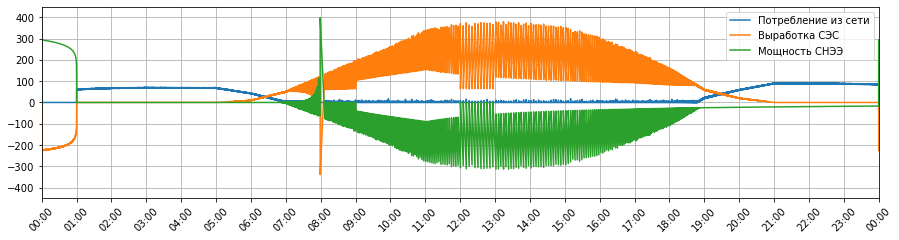

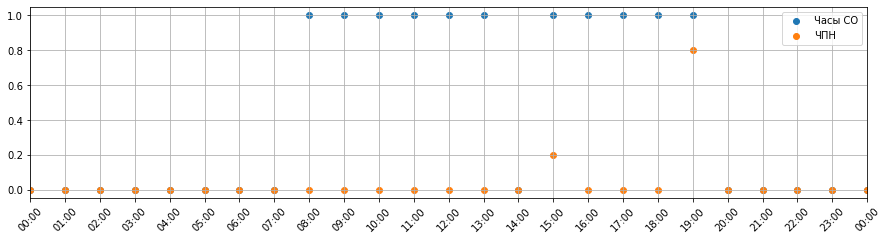

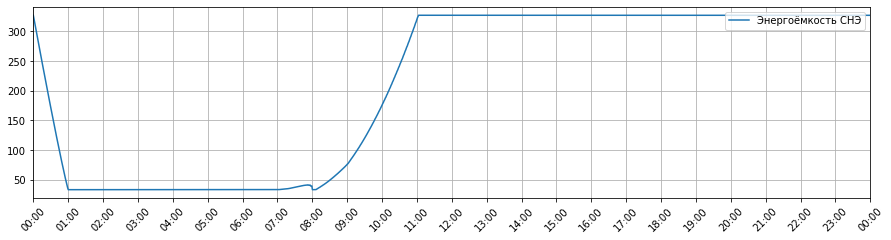

In [20]:
# Номер дня
day_number = 3

start_date = df_test.Timestamp[0] + datetime.timedelta(days = day_number - 1)
end_date = df_test.Timestamp[0] + datetime.timedelta(days = day_number)

myFmt = mdates.DateFormatter('%H:%M')

plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1).xaxis.set_major_formatter(myFmt)
plt.plot(df_test['Timestamp'], df_test['Power from grid'], label='Потребление из сети')
plt.plot(df_test['Timestamp'], df_test['Solar power'], label='Выработка СЭС')
plt.plot(df_test['Timestamp'], df_test['Accum set point'], label='Мощность СНЭЭ')
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.ylim([-450, 450])
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 2).xaxis.set_major_formatter(myFmt)
plt.scatter(df_hours['dt'], df_hours['so_h_forec'], label="Часы СО")
plt.scatter(df_hours['dt'], df_hours['ko_h_forec'], label="ЧПН")
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3).xaxis.set_major_formatter(myFmt)
plt.plot(df_test['Timestamp'], df_test['Stored energy'], label="Энергоёмкость СНЭ")
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

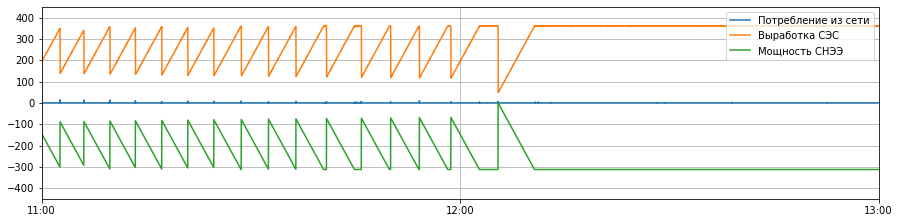

In [22]:
start_date = datetime.datetime(2020, 7, 9, 11)
end_date = datetime.datetime(2020, 7, 9, 13)

myFmt = mdates.DateFormatter('%H:%M')

plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1).xaxis.set_major_formatter(myFmt)
plt.plot(df_test['Timestamp'], df_test['Power from grid'], label='Потребление из сети')
plt.plot(df_test['Timestamp'], df_test['Solar power'], label='Выработка СЭС')
plt.plot(df_test['Timestamp'], df_test['Accum set point'], label='Мощность СНЭЭ')
plt.ylim([-450, 450])
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)])
plt.grid()
plt.show()
